https://github.com/ntienvu/KnownOptimum_BO

In [3]:
#! pip install --user --upgrade scipy==1.4.1 #別的版本可能會跳錯
import scipy
scipy.__version__

'1.4.1'

# Ackley function

https://www.indusmic.com/post/ackley-function

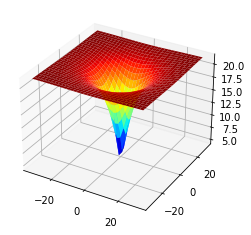

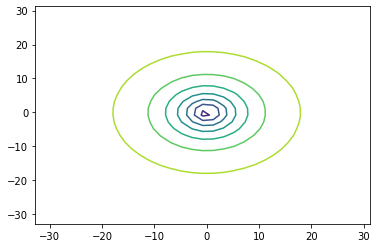

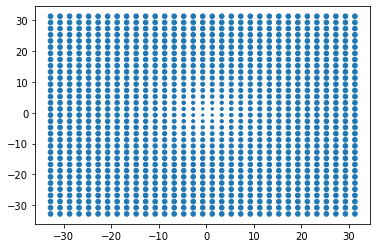

In [1]:
import matplotlib.pyplot as plt
from bayes_opt import BayesOpt_KnownOptimumValue,BayesOpt
import numpy as np
from bayes_opt import vis_ERM,functions
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
import matplotlib.pyplot as plt

def objective(x, y):
 return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2)))-exp(0.5 * (cos(2 * 
  pi * x)+cos(2 * pi * y))) + e + 20


r_min, r_max = -32.768, 32.768
xaxis = arange(r_min, r_max, 2.0)
yaxis = arange(r_min, r_max, 2.0)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
figure = plt.figure()
axis = figure.gca( projection='3d')
axis.plot_surface(x, y, results, cmap='jet', shade= "false")
plt.show()
plt.contour(x,y,results)
plt.show()
plt.scatter(x, y, results)
plt.show()

In [2]:
class YourFunction:
    def __init__(self):
       
        # define the search range for each variable
        self.bounds = np.asarray([
                                [-32.768, 32.768],  # variable 1
                                  [-32.768, 32.768] # variable 2
                                 ])
            
        self.input_dim = self.bounds.shape[0] # this is 2

        # do we want to maximize the function or minimize ?
        self.ismax=-1  # set -1 if we want to minimize
        
        # define the known optimum value if it is available
        self.fstar = 0 # set it None if we dont know #0.397887*self.ismax
        
        # define the name of your function
        self.name='ICML20'
        
    def evaluate_single_fx(self,X): # this is actually a Branin function
        # evaluate y=f(X)
        X = np.reshape(X,self.input_dim)
        x1,x2=X[0],X[1]
        
      
        return objective(x1, x2)*self.ismax # minimization problem
   
    
    def func(self,X):
        X=np.asarray(X)        
       
        if len(X.shape)==1: # 1 data point
            fx=self.evaluate_single_fx(X)
        else: # multiple data points
            fx=np.apply_along_axis( self.evaluate_single_fx,1,X)
            
        return fx  
myfunction=YourFunction()

Initial point：多一點

In [3]:
import random 

init_x_list = []
init_y_list = []
for i in range(10):
    x1 = random.uniform(-32.768, 32.768)
    x2 = random.uniform(-32.768, 32.768)
    y = objective(x1,x2) * -1
    init_x_list.append([x1,x2])
    init_y_list.append(y)

### Random Search 

In [4]:
x_list = init_x_list.copy()
y_list = init_y_list.copy()

for i in range(20):
    x1 = random.uniform(-32.768, 32.768)
    x2 = random.uniform(-32.768, 32.768)
    y = objective(x1,x2)* -1
    x_list.append([x1,x2])
    y_list.append(y)

In [5]:
def max_index(y_list):
    index_list = []
    for i in range(len(y_list)):
        y = y_list[i]
        max_value = max(y_list)
        if y == max_value:
            index_list.append(i)
    print(max_value)
    return index_list

index_list = max_index(y_list)

def best_x_value(x_list,index_list):
    best_x_value_list = []
    for i in index_list:
        best_x_value_list.append(x_list[i])
    return best_x_value_list
best_x_value(x_list,index_list)

-9.220589984661869


[[-1.474075457087892, -2.8012424783340393]]

In [6]:
random_list = y_list

### Normal GP with EI acquisition function

In [7]:
init_X = np.asarray( init_x_list)
init_Y=myfunction.func(init_X)
print(init_Y)

# create an empty object for BO using transformed GP
acq_name='ei'
IsTGP=0 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar, \
                              acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

#vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=10*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    #print(bo_tgp.X_ori[-1])
    print(tabulate([[ index,np.round(bo_tgp.X_ori[-1],3), np.round(bo_tgp.Y_ori[-1],3), np.round(bo_tgp.Y_ori.max(),3)]], \
               headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value']))
    

[-21.16625797 -22.05217533 -19.64139524 -20.82348961 -19.83441548
 -19.41034722 -21.33015759 -21.71063841 -20.65496512 -18.96146551]
y_lcb=[[-4.39041221]] y_ucb=[[4.76201344]] fstar_scaled=20.7282
EI
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     0  [  4.898 -22.405]           -20.95                -18.961
y_lcb=[[-5.00015283]] y_ucb=[[4.88425941]] fstar_scaled=21.6251
EI
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     1  [ 4.181 -3.616]          -12.716                -12.716
estimated lengthscale [0.001]
y_lcb=[[-3.05377855]] y_ucb=[[4.02094074]] fstar_scaled=8.4456
EI
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     2  [ 0.941 -1.621]           -6.266                 -6.266
  Iter  Selected x         Output y=f(x)    Best Observ

In [8]:
GP_EI_list = list(bo_tgp.Y_ori)

### Transformed GP with EI acquisition function

In [9]:
init_X = np.asarray( init_x_list)
init_Y=myfunction.func(init_X)
print(init_Y)

# create an empty object for BO using transformed GP
acq_name='ei'
IsTGP=1 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar, \
                              acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

#vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=10*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    #print(bo_tgp.X_ori[-1])
    print(tabulate([[ index,np.round(bo_tgp.X_ori[-1],3), np.round(bo_tgp.Y_ori[-1],3), np.round(bo_tgp.Y_ori.max(),3)]], \
               headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value']))

[-21.16625797 -22.05217533 -19.64139524 -20.82348961 -19.83441548
 -19.41034722 -21.33015759 -21.71063841 -20.65496512 -18.96146551]
y_lcb=[[-14.77660941]] y_ucb=[[10.56125663]] fstar_scaled=20.7282
EI
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     0  [  0.933 -19.529]          -20.493                -18.961
y_lcb=[[-15.48122083]] y_ucb=[[10.7940116]] fstar_scaled=21.7293
EI
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     1  [ 11.092 -30.083]          -20.162                -18.961
estimated lengthscale [0.01]
y_lcb=[[-16.20210084]] y_ucb=[[11.21340146]] fstar_scaled=22.5000
EI
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     2  [ 2.198 -0.305]           -7.113                 -7.113
  Iter  Selected x         Output y=f(x)    

In [10]:
TGP_EI_list = list(bo_tgp.Y_ori)

### Transformed GP with erm acquisition function

In [11]:
init_X = np.asarray( init_x_list)
init_Y=myfunction.func(init_X)
print(init_Y)

# create an empty object for BO using transformed GP
acq_name='erm'
IsTGP=1 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar, \
                              acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

#vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=10*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    #print(bo_tgp.X_ori[-1])
    print(tabulate([[ index,np.round(bo_tgp.X_ori[-1],3), np.round(bo_tgp.Y_ori[-1],3), np.round(bo_tgp.Y_ori.max(),3)]], \
               headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value'])) 

[-21.16625797 -22.05217533 -19.64139524 -20.82348961 -19.83441548
 -19.41034722 -21.33015759 -21.71063841 -20.65496512 -18.96146551]
y_lcb=[[-14.77660941]] y_ucb=[[10.56125663]] fstar_scaled=20.7282
EI
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     0  [  0.933 -19.529]          -20.493                -18.961
y_lcb=[[-15.48122075]] y_ucb=[[10.91316362]] fstar_scaled=21.7293
EI
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     1  [ 11.092 -30.083]          -20.162                -18.961
estimated lengthscale [0.01]
y_lcb=[[-16.20209599]] y_ucb=[[11.21339829]] fstar_scaled=22.5000
EI
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     2  [ 2.198 -0.305]           -7.113                 -7.113
  Iter  Selected x       Output y=f(x)    B

In [12]:
TGP_ERM_list = list(bo_tgp.Y_ori)

Comparison

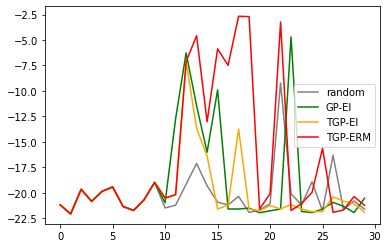

In [14]:
import matplotlib.pyplot as plt
x = list(range(0,30))
plt.plot(x,random_list, color='grey',label='random')
plt.plot(x,GP_EI_list, color='green',label='GP-EI')
plt.plot(x,TGP_EI_list, color='orange',label='TGP-EI')
plt.plot(x,TGP_ERM_list,color='red',label='TGP-ERM')
plt.legend(loc = 'center right')
plt.show()

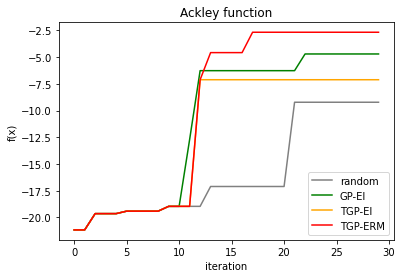

In [15]:
# 輸出當前iteration最佳值
def cur_best_list (num_list):
    new_list = []
    best = num_list[0]
    for num in num_list:
        if(num > best):
            new_list.append(num)
            best = num
        else:
            new_list.append(best)
    return new_list

random_list = cur_best_list(random_list)
GP_EI_list = cur_best_list(GP_EI_list)
TGP_EI_list = cur_best_list(TGP_EI_list)
TGP_ERM_list = cur_best_list(TGP_ERM_list)

x = list(range(0,30))
plt.plot(x,random_list, color='grey',label='random')
plt.plot(x,GP_EI_list, color='green',label='GP-EI')
plt.plot(x,TGP_EI_list, color='orange',label='TGP-EI')
plt.plot(x,TGP_ERM_list,color='red',label='TGP-ERM')
plt.legend(loc = 'lower right')
plt.xlabel('iteration')
plt.ylabel('f(x)')
plt.title('Ackley function')
plt.show()

# Eggholder function

In [1]:
import matplotlib.pyplot as plt
from bayes_opt import BayesOpt_KnownOptimumValue,BayesOpt
import numpy as np
from bayes_opt import vis_ERM,functions
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy import*
def f(x1,x2):
    a=sqrt(fabs(x2+x1/2+47))
    b=sqrt(fabs(x1-(x2+47)))
    c=-(x2+47)*sin(a)-x1*sin(b)
    return c
x1=linspace(-512,512,100)
x2=linspace(-512,512,100)
X1,X2=meshgrid(x1,x2)

def plotter(E,A):
    fig=plt.figure(figsize=[12,8])
    ax=plt.axes(projection='3d')
    ax.plot_surface(X1,X2,f(X1,X2),color='red',alpha=0.7)
    ax.plot_wireframe(X1,X2,f(X1,X2),ccount=2,rcount=2, color='orange',alpha=0.8)   
    ax.view_init(elev=E,azim=A)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')
    plt.show()

from ipywidgets import interactive
iplot=interactive(plotter,E=(-45,135,5),A=(-45,135,5))
iplot

interactive(children=(IntSlider(value=45, description='E', max=135, min=-45, step=5), IntSlider(value=45, desc…

In [3]:
f(512,404.2319)

-959.6406627106155

initial

In [4]:
import random 

init_x_list = []
init_y_list = []
for i in range(20):
    x1 = random.uniform(-512,512)
    x2 = random.uniform(-512,512)
    y = f(x1,x2) * -1
    init_x_list.append([x1,x2])
    init_y_list.append(y)

### Random Search

In [5]:
x_list = init_x_list.copy()
y_list = init_y_list.copy()

for i in range(50):
    x1 = random.uniform(-512, 512)
    x2 = random.uniform(-512, 512)
    y = f(x1,x2)* -1
    x_list.append([x1,x2])
    y_list.append(y)
    
def max_index(y_list):
    index_list = []
    for i in range(len(y_list)):
        y = y_list[i]
        max_value = max(y_list)
        if y == max_value:
            index_list.append(i)
    print(max_value)
    return index_list

index_list = max_index(y_list)

def best_x_value(x_list,index_list):
    best_x_value_list = []
    for i in index_list:
        best_x_value_list.append(x_list[i])
    return best_x_value_list
best_x_value(x_list,index_list)

random_list = y_list 

783.4547103427071


### Normal GP with EI acquisition function

In [6]:
class YourFunction:
    def __init__(self):
       
        # define the search range for each variable
        self.bounds = np.asarray([
                                [-512, 512],  # variable 1
                                  [-512, 512] # variable 2
                                 ])
            
        self.input_dim = self.bounds.shape[0] # this is 2

        # do we want to maximize the function or minimize ?
        self.ismax=-1  # set -1 if we want to minimize
        
        # define the known optimum value if it is available
        self.fstar = -959.6407  * self.ismax
        
        # define the name of your function
        self.name='ICML20'
        
    def evaluate_single_fx(self,X): # this is actually a Branin function
        # evaluate y=f(X)
        X = np.reshape(X,self.input_dim)
        x1,x2=X[0],X[1]
        
      
        return f(x1, x2)*self.ismax # minimization problem
   
    
    def func(self,X):
        X=np.asarray(X)        
       
        if len(X.shape)==1: # 1 data point
            fx=self.evaluate_single_fx(X)
        else: # multiple data points
            fx=np.apply_along_axis( self.evaluate_single_fx,1,X)
            
        return fx  
myfunction=YourFunction()

In [7]:
init_X = np.asarray( init_x_list)
init_Y=myfunction.func(init_X)
print(init_Y)

# create an empty object for BO using transformed GP
acq_name='ei'
IsTGP=0 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar,                               acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)
#vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=25*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    #print(bo_tgp.X_ori[-1])
    print(tabulate([[ index,np.round(bo_tgp.X_ori[-1],3), np.round(bo_tgp.Y_ori[-1],3), np.round(bo_tgp.Y_ori.max(),3)]],                headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value']))

GP_EI_list = list(bo_tgp.Y_ori)

[ 155.03158546 -257.65466479   -7.26910624  312.63447242 -205.42182933
  783.45471034  212.67453109  376.83666211 -478.33692507   71.50432106
  392.16714277 -361.00971098  149.70717431  585.61868361  119.60480034
 -370.87979204  224.55097361  -77.32464537 -209.29673629  -36.3164639 ]
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     0  [419.034 512.   ]           12.032                783.455
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     1  [360.091 429.678]         -127.089                783.455
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     2  [512.    420.787]          641.762                783.455
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  -----------

### Transformed GP with EI acquisition function

In [8]:
init_X = np.asarray(init_x_list)
init_Y=myfunction.func(init_X)
print(init_Y)

# create an empty object for BO using transformed GP
acq_name='ei'
IsTGP=1 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar,                               acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

#vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=25*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    #print(bo_tgp.X_ori[-1])
    print(tabulate([[ index,np.round(bo_tgp.X_ori[-1],3), np.round(bo_tgp.Y_ori[-1],3), np.round(bo_tgp.Y_ori.max(),3)]],                headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value']))

TGP_EI_list = list(bo_tgp.Y_ori)


[ 155.03158546 -257.65466479   -7.26910624  312.63447242 -205.42182933
  783.45471034  212.67453109  376.83666211 -478.33692507   71.50432106
  392.16714277 -361.00971098  149.70717431  585.61868361  119.60480034
 -370.87979204  224.55097361  -77.32464537 -209.29673629  -36.3164639 ]
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     0  [451.865 506.496]           -82.83                783.455
  Iter  Selected x             Output y=f(x)    Best Observed Value
------  -------------------  ---------------  ---------------------
     1  [ 415.961 -373.619]          680.186                783.455
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     2  [358.191 453.223]          184.891                783.455
  Iter  Selected x             Output y=f(x)    Best Observed Value
------  -------------------  ---------------  -

### Transformed GP with erm acquisition function


In [9]:
init_X = np.asarray( init_x_list)
init_Y=myfunction.func(init_X)
print(init_Y)

# create an empty object for BO using transformed GP
acq_name='erm'
IsTGP=1 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar,                               acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

#vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=25*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    #print(bo_tgp.X_ori[-1])
    print(tabulate([[ index,np.round(bo_tgp.X_ori[-1],3), np.round(bo_tgp.Y_ori[-1],3), np.round(bo_tgp.Y_ori.max(),3)]],                headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value'])) 

TGP_ERM_list = list(bo_tgp.Y_ori)

[ 155.03158546 -257.65466479   -7.26910624  312.63447242 -205.42182933
  783.45471034  212.67453109  376.83666211 -478.33692507   71.50432106
  392.16714277 -361.00971098  149.70717431  585.61868361  119.60480034
 -370.87979204  224.55097361  -77.32464537 -209.29673629  -36.3164639 ]
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     0  [445.95  501.356]          -21.907                783.455
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     1  [357.834 445.5  ]           52.507                783.455
  Iter  Selected x           Output y=f(x)    Best Observed Value
------  -----------------  ---------------  ---------------------
     2  [250.088 124.127]          -42.394                783.455
  Iter  Selected x             Output y=f(x)    Best Observed Value
------  -------------------  ---------------  -------

### Comparison

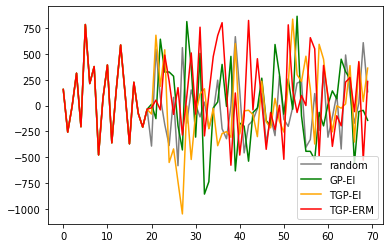

In [10]:
import matplotlib.pyplot as plt
x = list(range(0,70))
plt.plot(x,random_list, color='grey',label='random')
plt.plot(x,GP_EI_list, color='green',label='GP-EI')
plt.plot(x,TGP_EI_list, color='orange',label='TGP-EI')
plt.plot(x,TGP_ERM_list,color='red',label='TGP-ERM')
plt.legend(loc = 'lower right')
plt.show()

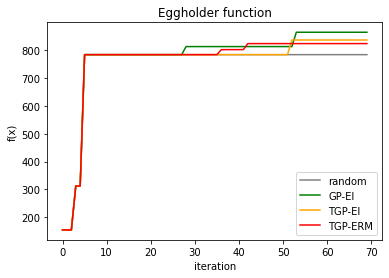

In [11]:
# 輸出當前iteration最佳值
def cur_best_list (num_list):
    new_list = []
    best = num_list[0]
    for num in num_list:
        if(num > best):
            new_list.append(num)
            best = num
        else:
            new_list.append(best)
    return new_list

random_list = cur_best_list(random_list)
GP_EI_list = cur_best_list(GP_EI_list)
TGP_EI_list = cur_best_list(TGP_EI_list)
TGP_ERM_list = cur_best_list(TGP_ERM_list)

x = list(range(0,70))
plt.plot(x,random_list, color='grey',label='random')
plt.plot(x,GP_EI_list, color='green',label='GP-EI')
plt.plot(x,TGP_EI_list, color='orange',label='TGP-EI')
plt.plot(x,TGP_ERM_list,color='red',label='TGP-ERM')
plt.legend(loc = 'lower right')
plt.xlabel('iteration')
plt.ylabel('f(x)')
plt.title('Eggholder function')
plt.show()

# DROP WAVE FUNCTION

https://www.indusmic.com/post/python-implementation-of-cross-in-tray-function

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy import*
 
def f(x1,x2):
    b=0.5*(x1*x1+x2*x2)+2
    a=-(1+cos(12*sqrt(x1*x1+x2*x2)))/b
    return a
x1=linspace(-5.12,5.12,100)
x2=linspace(-5.12,5.12,100)
X1,X2=meshgrid(x1,x2)
 
def plotter(E,A):
    fig=plt.figure(figsize=[12,8])
    ax=plt.axes(projection='3d')
    ax.plot_surface(X1,X2,f(X1,X2),color='red',alpha=0.7)
    ax.plot_wireframe(X1,X2,f(X1,X2),ccount=2,rcount=2,color='pink', alpha=0.2)
    ax.view_init(elev=E,azim=A)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')
    plt.show()
 
from ipywidgets import interactive
iplot=interactive(plotter,E=(-60,30,5),A=(-60,30,5))
iplot

interactive(children=(IntSlider(value=-15, description='E', max=30, min=-60, step=5), IntSlider(value=-15, des…

0.37882260024880027
[1.00680640e-07 7.65601572e-06 2.84998556e-05 1.02690724e-05
 8.61045026e-06 2.36885040e-06 1.12629623e-06 9.36691422e-06
 5.66107294e-04 7.41690520e-08]
y_lcb=[[-2.14596604]] y_ucb=[[1.51742714]] fstar_scaled=5960.8362
EI
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     0  [-1.198  2.957]            0.259                  0.259
y_lcb=[[-2.18992936]] y_ucb=[[3.52105795]] fstar_scaled=13.1248
EI
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     1  [-0.675  2.863]            0.041                  0.259
estimated lengthscale [0.00104842]
y_lcb=[[-5.53169319]] y_ucb=[[7.03429174]] fstar_scaled=13.6552
EI
  Iter  Selected x         Output y=f(x)    Best Observed Value
------  ---------------  ---------------  ---------------------
     2  [-2.229  3.142]             0.04                  0.259
y_lcb=[[-10.

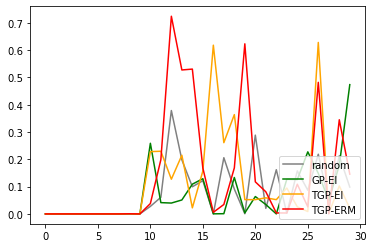

In [7]:
import matplotlib.pyplot as plt
from bayes_opt import BayesOpt_KnownOptimumValue,BayesOpt
import numpy as np
from bayes_opt import vis_ERM,functions
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

# initial 
import random 

init_x_list = []
init_y_list = []
for i in range(10):
    x1 = random.uniform(-5.12,5.12)
    x2 = random.uniform(-5.12,5.12)
    y = f(x1,x2) * -1
    init_x_list.append([x1,x2])
    init_y_list.append(y)


# ### Random Search

x_list = init_x_list.copy()
y_list = init_y_list.copy()

for i in range(20):
    x1 = random.uniform(-5.12, 5.12)
    x2 = random.uniform(-5.12, 5.12)
    y = f(x1,x2)* -1
    x_list.append([x1,x2])
    y_list.append(y)
    
def max_index(y_list):
    index_list = []
    for i in range(len(y_list)):
        y = y_list[i]
        max_value = max(y_list)
        if y == max_value:
            index_list.append(i)
    print(max_value)
    return index_list

index_list = max_index(y_list)

def best_x_value(x_list,index_list):
    best_x_value_list = []
    for i in index_list:
        best_x_value_list.append(x_list[i])
    return best_x_value_list
best_x_value(x_list,index_list)

random_list = y_list 


# ### Normal GP with EI acquisition function
class YourFunction:
    def __init__(self):
       
        # define the search range for each variable
        self.bounds = np.asarray([
                                [-5.12, 5.12],  # variable 1
                                  [-5.12, 5.12] # variable 2
                                 ])
            
        self.input_dim = self.bounds.shape[0] # this is 2

        # do we want to maximize the function or minimize ?
        self.ismax=-1  # set -1 if we want to minimize
        
        # define the known optimum value if it is available
        self.fstar = -1 *  self.ismax
        
        # define the name of your function
        self.name='ICML20'
        
    def evaluate_single_fx(self,X): # this is actually a Branin function
        # evaluate y=f(X)
        X = np.reshape(X,self.input_dim)
        x1,x2=X[0],X[1]
        
      
        return f(x1, x2)*self.ismax # minimization problem
   
    
    def func(self,X):
        X=np.asarray(X)        
       
        if len(X.shape)==1: # 1 data point
            fx=self.evaluate_single_fx(X)
        else: # multiple data points
            fx=np.apply_along_axis( self.evaluate_single_fx,1,X)
            
        return fx  
myfunction=YourFunction()

# initial
init_X = np.asarray(init_x_list)
init_Y=myfunction.func(init_X)
print(init_Y)

# create an empty object for BO using transformed GP
acq_name='ei'
IsTGP=0 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar,                               acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)
8
#vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=10*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    #print(bo_tgp.X_ori[-1])
    print(tabulate([[ index,np.round(bo_tgp.X_ori[-1],3), np.round(bo_tgp.Y_ori[-1],3), np.round(bo_tgp.Y_ori.max(),3)]],                headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value']))

GP_EI_list = list(bo_tgp.Y_ori)


# ### Transformed GP with EI acquisition function

init_X = np.asarray( init_x_list)
init_Y=myfunction.func(init_X)
print(init_Y)

# create an empty object for BO using transformed GP
acq_name='ei'
IsTGP=1 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar,                               acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

#vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=10*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    #print(bo_tgp.X_ori[-1])
    print(tabulate([[ index,np.round(bo_tgp.X_ori[-1],3), np.round(bo_tgp.Y_ori[-1],3), np.round(bo_tgp.Y_ori.max(),3)]],                headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value']))

TGP_EI_list = list(bo_tgp.Y_ori)


# ### Transformed GP with erm acquisition function
# 

init_X = np.asarray(init_x_list)
init_Y=myfunction.func(init_X)
print(init_Y)

# create an empty object for BO using transformed GP
acq_name='erm'
IsTGP=1 # using Transformed GP

bo_tgp=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar,                               acq_name=acq_name,IsTGP=IsTGP,verbose=1)
bo_tgp.init_with_data(init_X=init_X,init_Y=init_Y)

#vis_ERM.plot_1d_tgp_Forrester_EI_ERM(bo_tgp,fstar=myfunction.fstar)


NN=10*myfunction.input_dim
for index in range(0,NN):
    xt=bo_tgp.select_next_point()
    #print(bo_tgp.X_ori[-1])
    print(tabulate([[ index,np.round(bo_tgp.X_ori[-1],3), np.round(bo_tgp.Y_ori[-1],3), np.round(bo_tgp.Y_ori.max(),3)]],                headers=['Iter','Selected x', 'Output y=f(x)', 'Best Observed Value'])) 

TGP_ERM_list = list(bo_tgp.Y_ori)


# ### Comparison

import matplotlib.pyplot as plt
x = list(range(0,30))
plt.plot(x,random_list, color='grey',label='random')
plt.plot(x,GP_EI_list, color='green',label='GP-EI')
plt.plot(x,TGP_EI_list, color='orange',label='TGP-EI')
plt.plot(x,TGP_ERM_list,color='red',label='TGP-ERM')
plt.legend(loc = 'lower right')
plt.show()


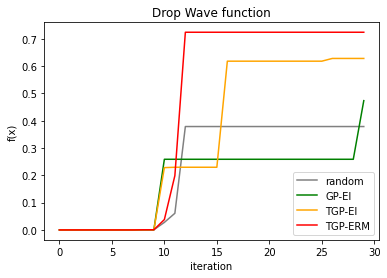

In [9]:
# 輸出當前iteration最佳值
def cur_best_list (num_list):
    new_list = []
    best = num_list[0]
    for num in num_list:
        if(num > best):
            new_list.append(num)
            best = num
        else:
            new_list.append(best)
    return new_list

random_list = cur_best_list(random_list)
GP_EI_list = cur_best_list(GP_EI_list)
TGP_EI_list = cur_best_list(TGP_EI_list)
TGP_ERM_list = cur_best_list(TGP_ERM_list)

x = list(range(0,30))
plt.plot(x,random_list, color='grey',label='random')
plt.plot(x,GP_EI_list, color='green',label='GP-EI')
plt.plot(x,TGP_EI_list, color='orange',label='TGP-EI')
plt.plot(x,TGP_ERM_list,color='red',label='TGP-ERM')
plt.legend(loc = 'lower right')
plt.xlabel('iteration')
plt.ylabel('f(x)')
plt.title('Drop Wave function')
plt.show()